<img align = 'center' src="./Images/ML_SWE.jpg" alt = 'image' width = '1000'/>

# Long Short Term Memory

**Savalan Neisary - The Univeristy of Alabama**

* I'm a second-year Ph.D. student, and I'm a data science and ML nerd trying to use it in hydrological modeling and hydrological drought and streamflow predictions. 

* My goal for participating in this hackweek is to learn how to implement ML/DL methods in snow-water equivalent modeling and what kind of inputs I should use with these models. 

* We implemented LSTM and 1D-CNN algorithms during the past few days, and the results showed that CNN has better results than LSTM.



In [1]:
import os
import DataProcess
import cnn as bls

2023-10-27 00:40:46.887035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-27 00:40:46.887066: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
cwd = '/home/jovyan/Snow-Extrapolation/contributors/cnn'
datapath = '/home/jovyan/Snow-Extrapolation'

In [3]:
#Define hold out year
HOY = 2019
#Run data processing script to partition key regional dataframes
#note, need to load RegionTrain_SCA.h5,
RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, RegionTest_notScaled = DataProcess.DataProcess(HOY, datapath, cwd)

Processing training dataframes for each region
N_Sierras
S_Sierras_Low
S_Sierras_High


In [5]:
#Get regions
Regions = list(RegionTrain.keys())
Predictions = {} 
for Region in Regions:
    epochs= 3
    model = bls.Model_train(cwd, epochs, RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, Region)
    
    Predictions[Region] = bls.Model_predict(cwd,  RegionTest, RegionObs_Test, RegionTest_notScaled, Region, model)
    
    
    

Training model for:  N_Sierras
All previous files deleted successfully.
(750, 1, 105)


2023-10-27 00:40:51.738460: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-27 00:40:51.738489: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-27 00:40:51.738506: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-savalann): /proc/driver/nvidia/version does not exist
2023-10-27 00:40:51.738710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 0s 852us/step
Training model for:  S_Sierras_Low
All previous files deleted successfully.
(838, 1, 6)
9/9 [==============================] - 0s 837us/step
Training model for:  S_Sierras_High
All previous files deleted successfully.
(1632, 1, 40)
18/18 [==============================] - 0s 686us/step


Preliminary Model Analysis for:  N_Sierras
 R2 is  0.8215270484575786
 RMSE is  15.389169364680054
 R2 fSCA is  0.8160107020723175
 RMSE fSCA is  15.625188215596065


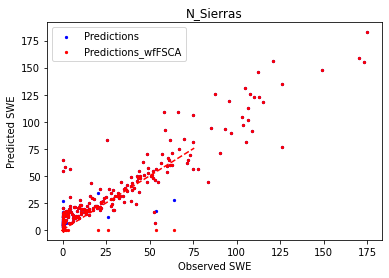

Preliminary Model Analysis for:  S_Sierras_Low
 R2 is  0.9733329614852817
 RMSE is  4.120510367823337
 R2 fSCA is  0.865802204237581
 RMSE fSCA is  9.24349708044906


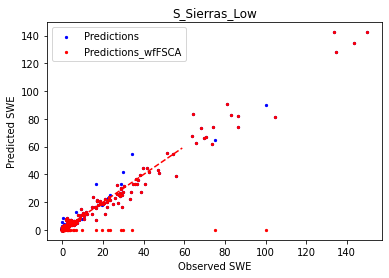

Preliminary Model Analysis for:  S_Sierras_High
 R2 is  0.9657119397999413
 RMSE is  8.686378432095365
 R2 fSCA is  0.954178618317687
 RMSE fSCA is  10.041564407051029


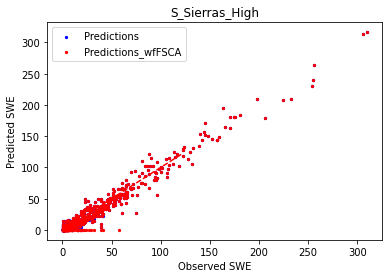

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA
0,N_Sierras,0.82,15.39,0.82,15.63
1,S_Sierras_Low,0.97,4.12,0.87,9.24
2,S_Sierras_High,0.97,8.69,0.95,10.04


In [6]:
Performance = bls.Prelim_Eval(cwd, Predictions)
Performance